# EDA Notebook for Analysis of fin ratios

### Understanding the trend of different financial ratios and metric is a critical part in analysis of business. This notebook explores those trends to give the sense of stability of business, growth hsitory, returns and margins. 

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from data.scripts.simplified_finance_stats.fin_stats import fin_stats
from data.scripts.simplified_finance_stats.fin_ratios import get_ratios
from data.scripts.simplified_finance_stats.fin_stats_2 import fin_stats_2
from report_13f.brk.company_13f import company_13f
from data.scripts.build_training_data.train_data import train_data
from data.scripts.simplified_finance_stats.stock_stats import stock_stats

pd.options.display.max_rows = 999

In [2]:
# Set path for data
base_path = '../data/'
sheets_path = 'combined_simplified/combined_all_us.csv' 
other_path = 'combined_simplified/others_all_us.csv'
mkt_path = 'combined_simplified/stock_stats_all_us.csv'


Three kinds of data are used here.
1. The basic fundamental financial data from balance sheet, income statement and cash flow statement
2. Other financial data not included in the above statements
3. Market data related to the stock such as mkt_cap, price etc

In [3]:
# setup all data
finances = fin_stats(base_path + sheets_path)
fin_others = fin_stats_2(base_path + other_path)
mkt_data = stock_stats(base_path + mkt_path)

In [4]:
aapl_b = finances.get_sheet("AAPL","balance_sheet")
aapl_i = finances.get_sheet("AAPL","income_sheet")
aapl_c = finances.get_sheet("AAPL","cashflow_sheet")
aapl_o = fin_others.get_sheet("AAPL")
aapl_mk = mkt_data.get_stock_data("AAPL")

Build ratios dataframe from the above data

In [5]:
df_ratios = get_ratios(aapl_b,aapl_i,aapl_c,aapl_o,aapl_mk)

#### Understand trends for various financial metrics and ratios

In [6]:
from data.scripts.simplified_finance_stats.capture_trends import get_trend_data

In [7]:
# Specify the timeline with lsat n years to get data from
last_n_years = 20
cols_to_keep = df_ratios.columns.tolist()[-1*last_n_years::]
df_ratios = df_ratios[cols_to_keep]
d = get_trend_data(df_ratios)

In [44]:
d.head()

,mean,std,avg_growth_rate,slope,constant,r2
gross_mrgn,0.357250,0.071167,-0.021513,0.011193,-22.113089,0.865801
prft_mrgn,0.139518,0.087101,-1.366614,0.012520,-24.995241,0.723201
oper_mrgn,0.172176,0.127332,-0.667780,0.018924,-37.817186,0.773052
capx_to_rev,0.033923,0.015562,-0.048261,0.002255,-4.493538,0.735059
ni_to_rev,0.010619,0.010462,-10.941921,0.000586,-1.165676,0.109788


Currently, get_trend_data, fits a linear regression model. In the above dataframe, the slope and constant are the outputs of the model. I believe fitting too complex models to financial data is not very helpful especially if we are looking into general trends. It is better to be roughly right than precisely wrong.

In [60]:
df_ratios.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
gross_mrgn,0.267632,0.290349,0.281849,0.249301,0.299721,0.293185,0.290917,0.302110,0.300689,0.352037,0.356569,0.417341,0.408064,0.421621,0.459191,0.415780,0.429350,0.445526,0.434769,0.429007
prft_mrgn,0.052011,0.097978,0.098459,-0.004662,0.011320,0.011116,0.033337,0.095829,0.102977,0.145630,0.148835,0.191936,0.214841,0.239466,0.266651,0.216705,0.216144,0.228458,0.212408,0.210924
oper_mrgn,0.045110,0.062928,0.077665,-0.062092,0.008011,0.004028,0.042155,0.118441,0.127000,0.183662,0.193202,0.273628,0.281870,0.312151,0.352960,0.286695,0.287223,0.304773,0.276516,0.267604
capx_to_rev,0.007743,0.007662,0.013403,0.043259,0.030303,0.026422,0.021259,0.018663,0.034015,0.030617,0.033591,0.026664,0.030740,0.039354,0.053000,0.047774,0.052359,0.048123,0.059203,0.054316
ni_to_rev,-0.010941,-0.006195,0.002881,0.024240,0.009753,0.008217,0.003140,0.005814,0.022366,0.017412,0.019028,0.009556,0.014994,0.022596,0.032062,0.008238,0.008890,-0.000043,0.010363,0.010007


Plot regression and distribution of df_ratios dataframe

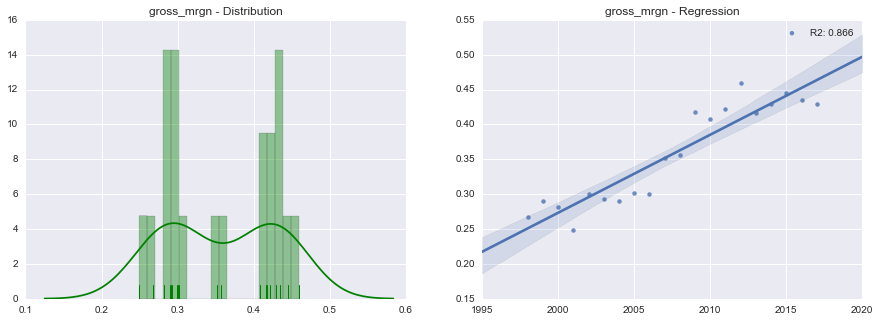

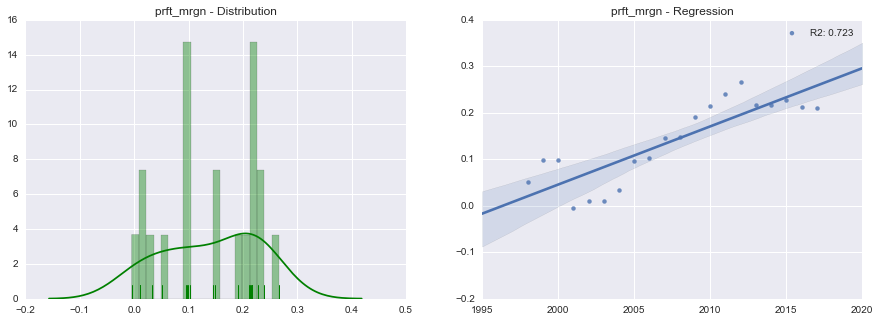

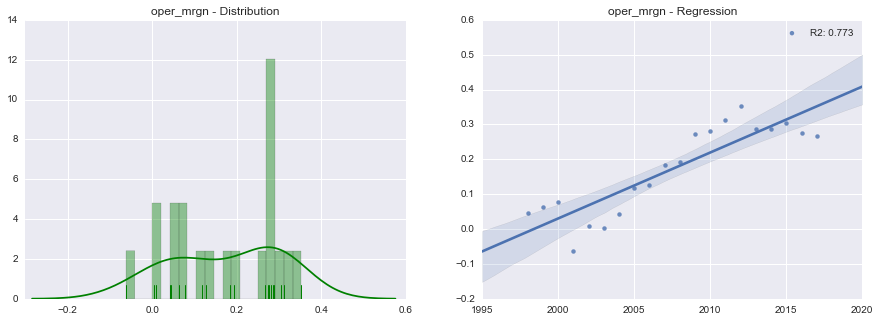

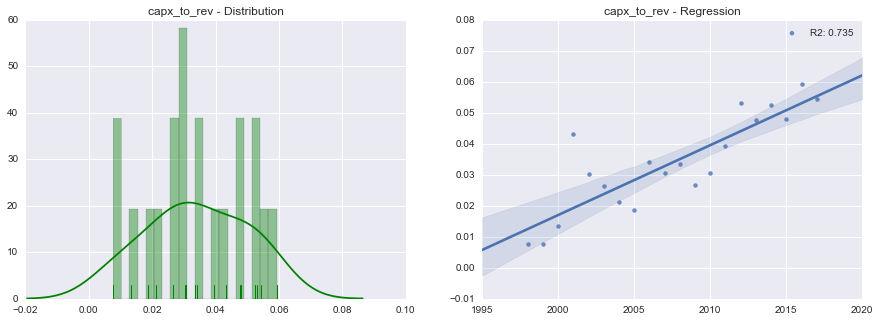

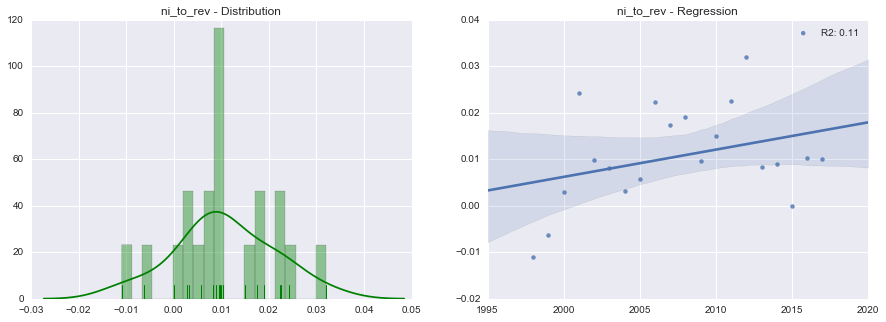

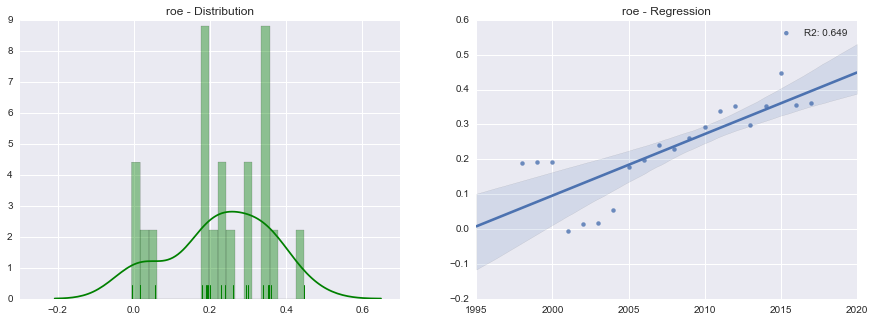

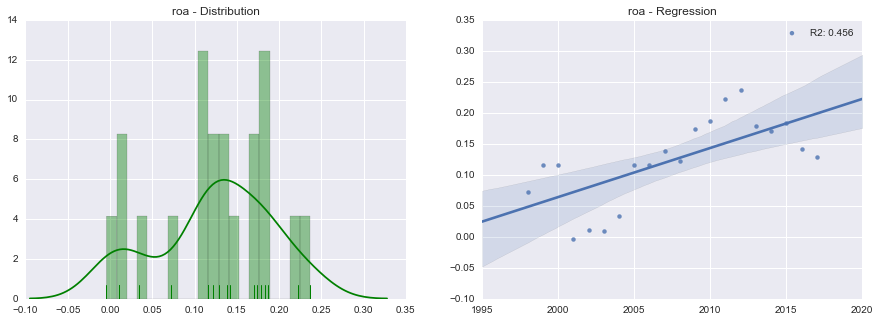

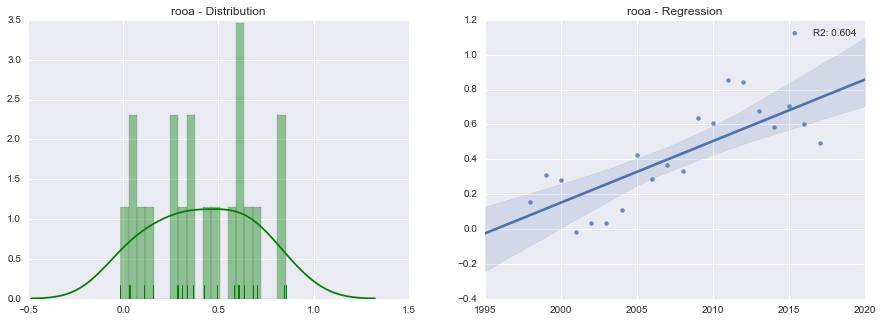

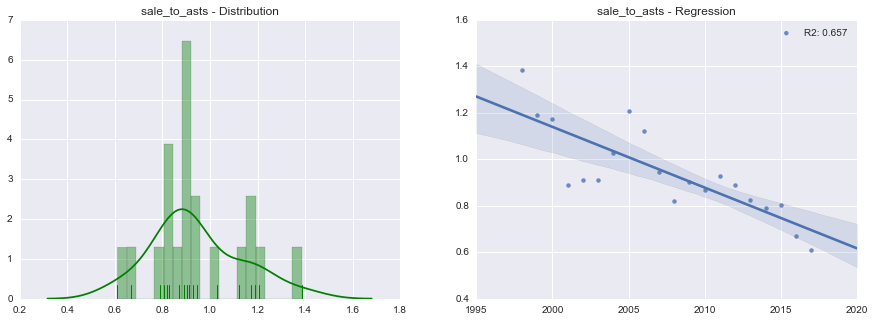

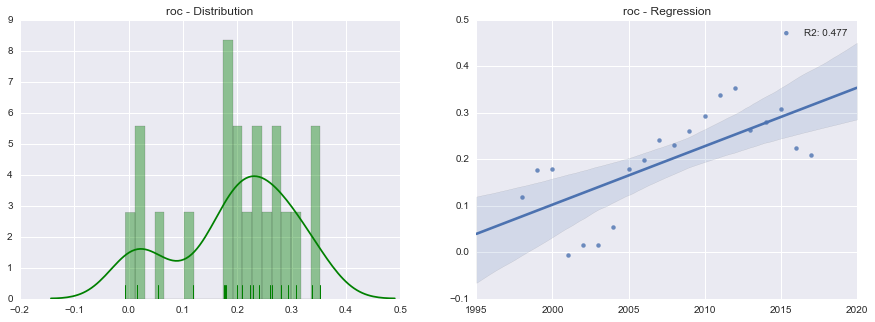

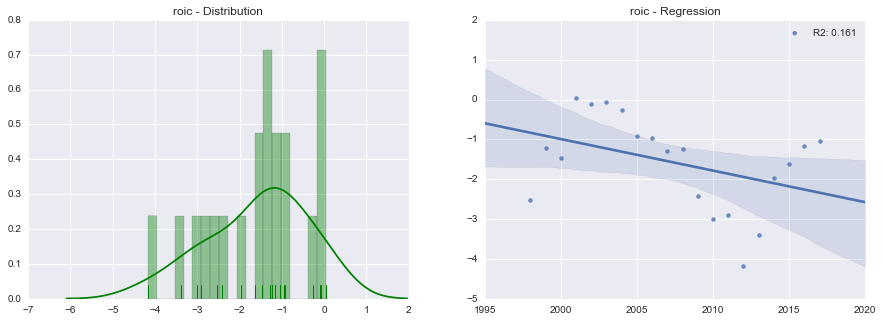

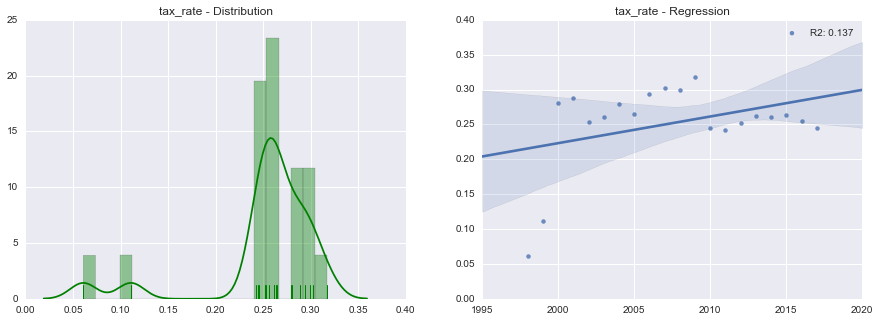

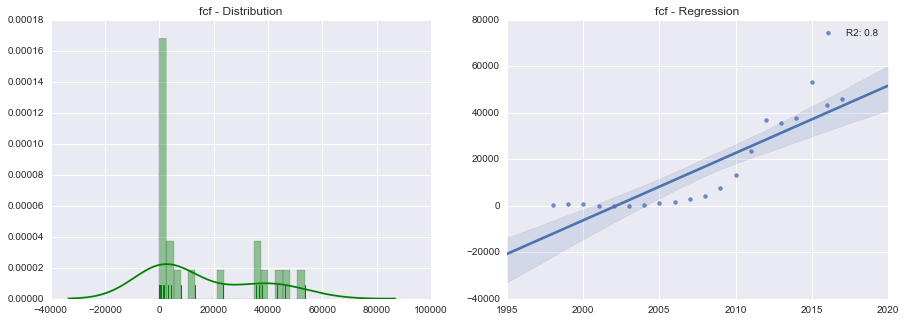

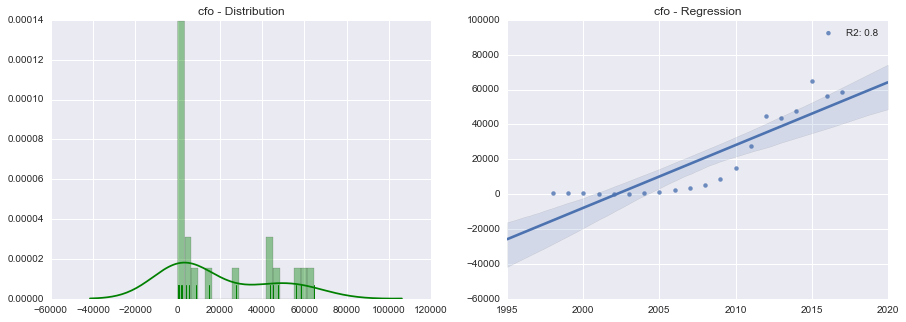

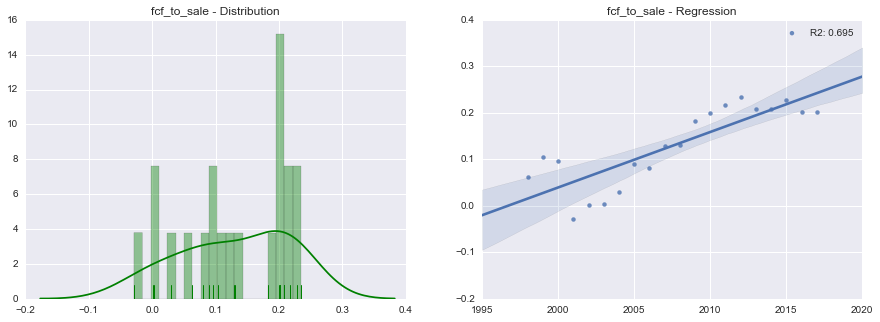

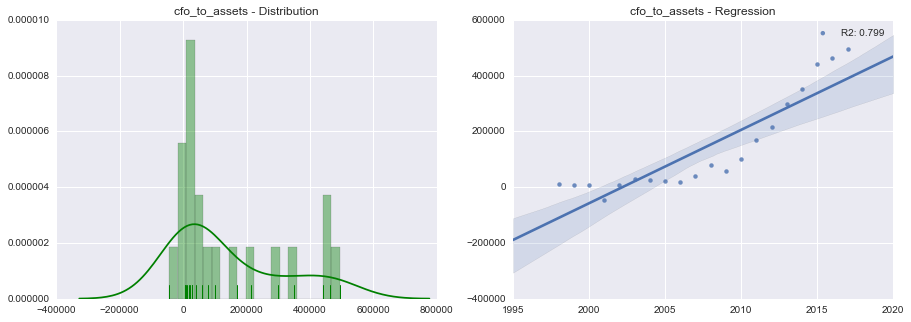

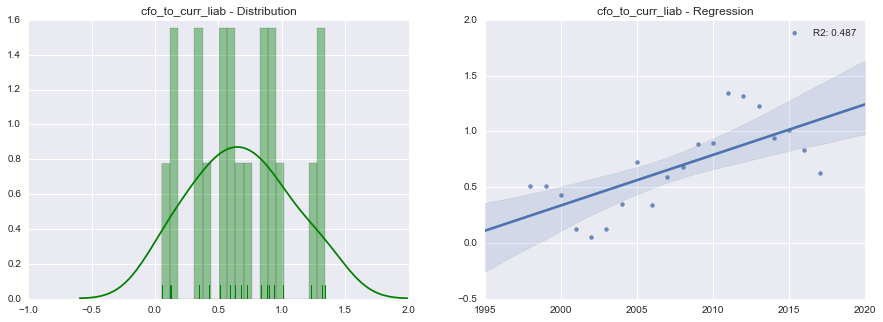

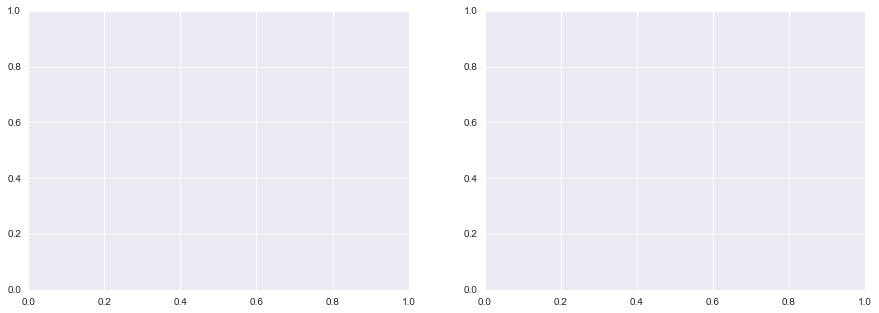

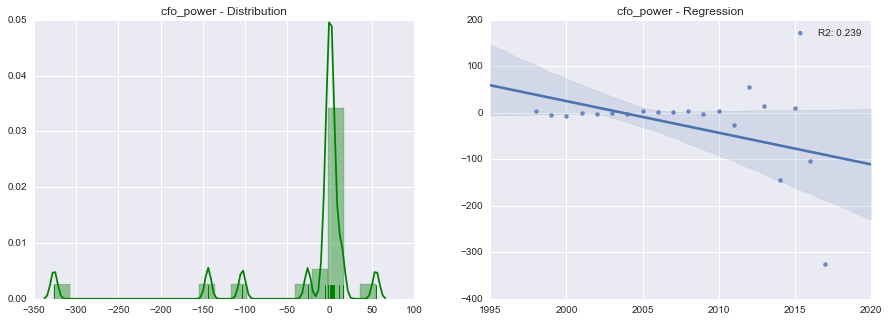

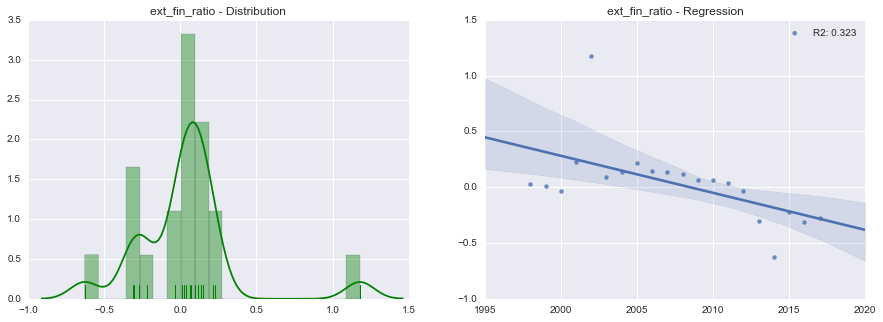

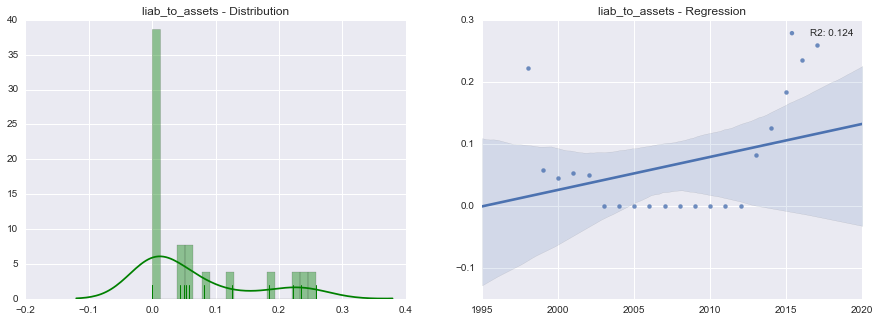

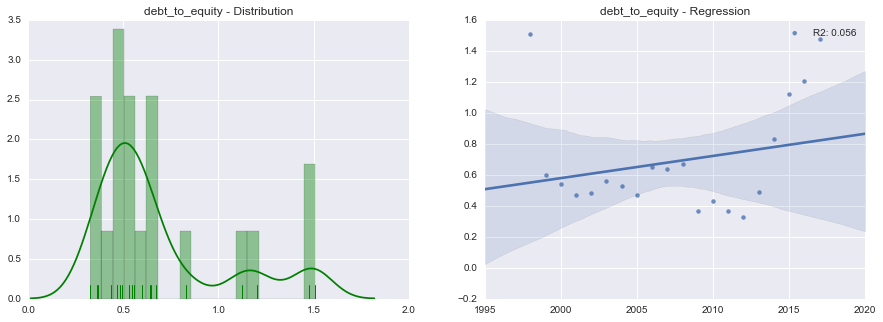

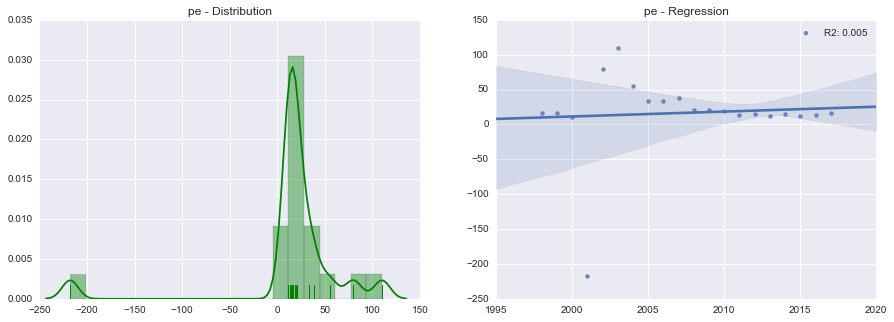

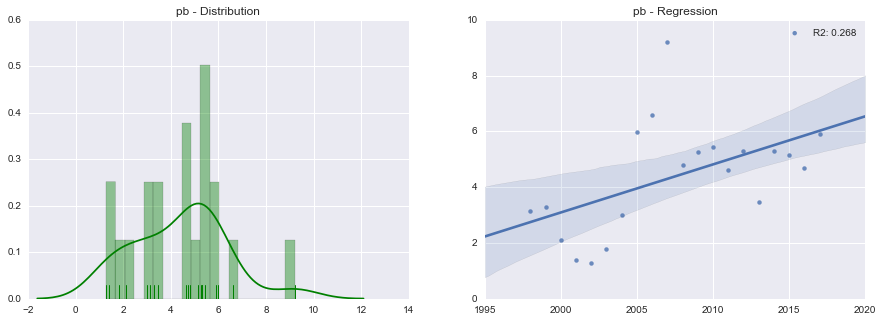

In [61]:
x = np.asarray(df_ratios.columns.tolist())
#x = x - x[0]

for i, feature in enumerate(df_ratios.index.tolist()):
    y = df_ratios.loc[feature].values
    y2 = d['slope'].loc[feature]*x + d['constant'].loc[feature]
    r2_val = round(d['r2'].loc[feature],3)
    
    try:
        # call regplot on each axes
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        fig.set_size_inches(15,5)
        sns.distplot(y,kde=1,bins=20,rug=1,norm_hist=0,color='g', ax=ax1)
        ax1.set_title(feature + ' - Distribution')
        sns.regplot(x, y,label='R2: ' + str(r2_val), ax=ax2)
        ax2.set_title(feature + ' - Regression')
        ax2.legend(loc='best')
        plt.show()
    except:
        pass
